In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("../data/cleaned_dataset.csv")

In [20]:
df.describe()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,231715.000000,231715.000000,231715.000000,231715.0,231715.000000,231715.000000,231715.000000,231715.000000,231715.000000,231715.000000,231715.000000,231715.000000,231715.000000,2.317150e+05,231715.000000,231715.000000,2.317150e+05
mean,5271.769178,19.492363,263.939935,0.0,98269.268118,2021.354440,29.150983,94.297426,0.207190,0.783290,46.745571,802.223270,28.880931,2.343812e+08,312.400578,60.395991,5.304008e+10
std,2999.813705,8.213668,144.475690,0.0,310.578835,2.995094,13.039942,34.646170,0.405294,0.602884,84.361394,7239.765856,14.904432,6.832223e+07,99.291410,18.880669,1.643821e+07
min,0.000000,0.000000,0.000000,0.0,98001.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.385000e+03,0.000000,0.000000,5.300195e+10
25%,3459.500000,16.000000,140.000000,0.0,98052.000000,2020.000000,17.000000,88.000000,0.000000,0.000000,0.000000,0.000000,17.000000,2.034907e+08,257.000000,57.000000,5.303301e+10
50%,5276.000000,16.000000,298.000000,0.0,98126.000000,2023.000000,39.000000,98.000000,0.000000,1.000000,0.000000,0.000000,32.000000,2.512799e+08,307.000000,72.000000,5.303303e+10
75%,6478.000000,26.000000,377.000000,0.0,98375.000000,2023.000000,39.000000,101.000000,0.000000,1.000000,38.000000,0.000000,42.000000,2.687036e+08,368.000000,73.000000,5.305307e+10
max,13531.000000,38.000000,485.000000,0.0,99403.000000,2025.000000,45.000000,169.000000,1.000000,2.000000,337.000000,845000.000000,49.000000,4.792548e+08,562.000000,74.000000,5.307794e+10


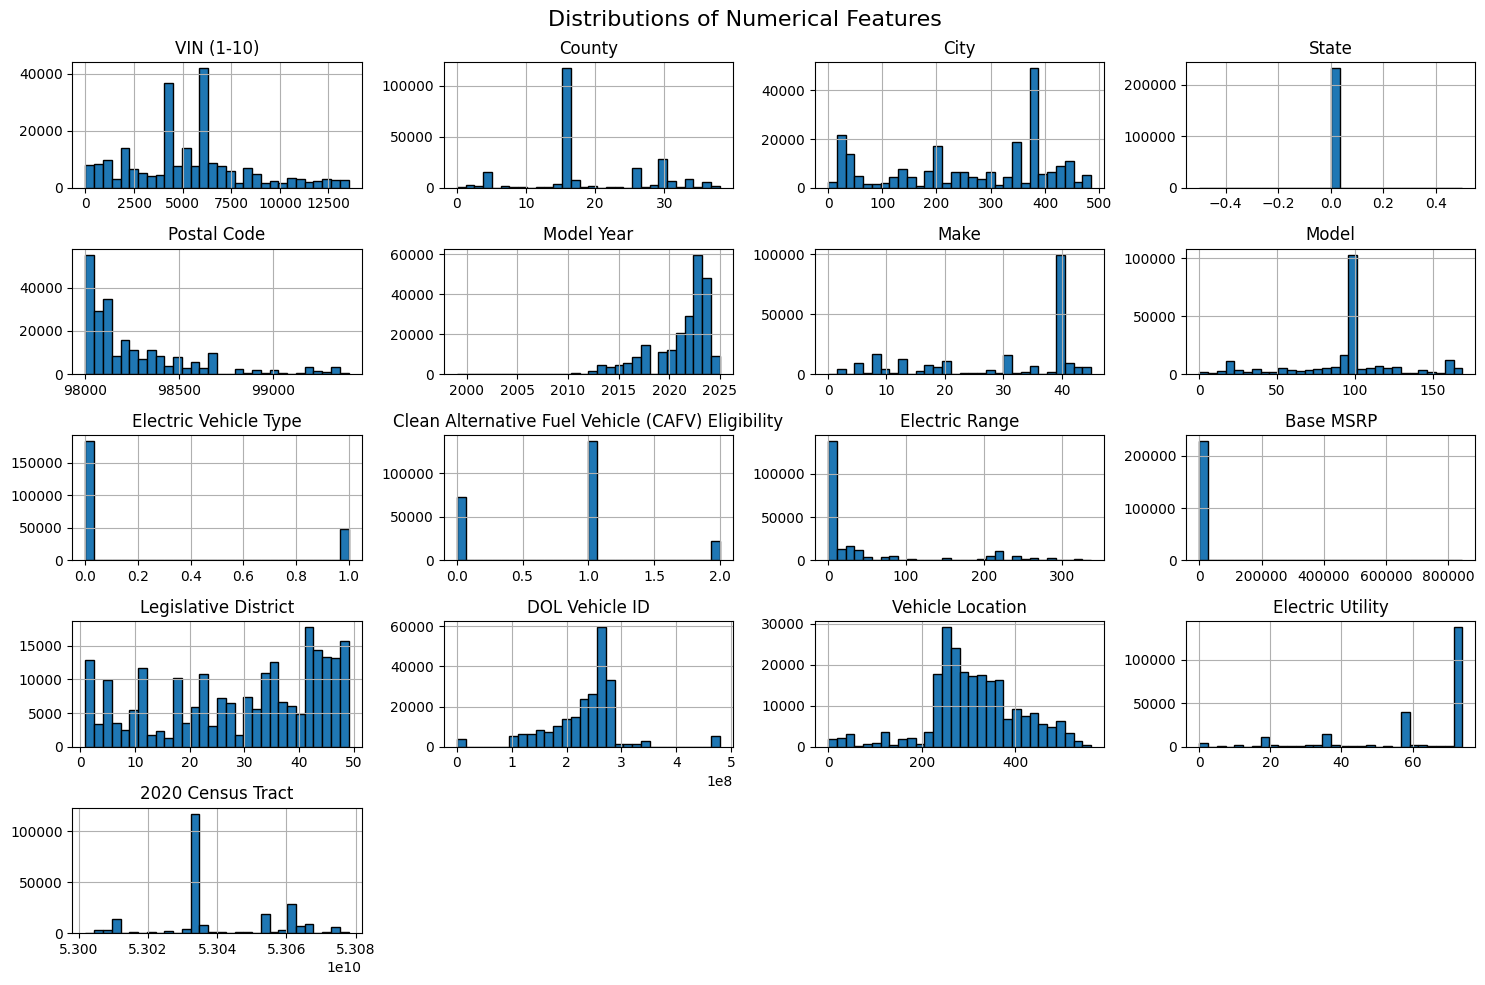

In [21]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

Cars appeared to have 0 km Electric Range and not Eligible:  136612 . Total percent 59.0 of cars are ineligible


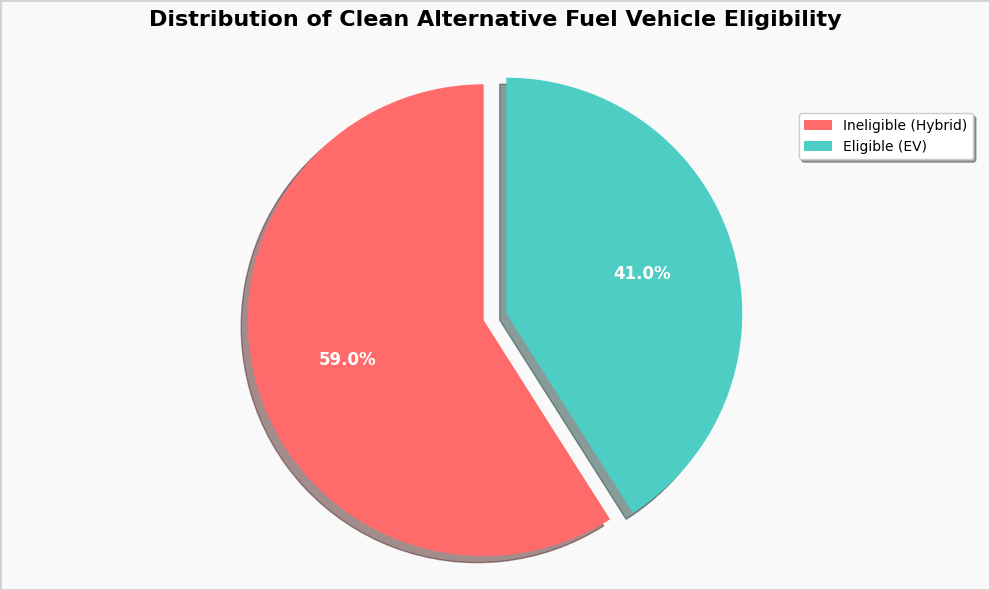

In [22]:
zero_range = df.loc[df["Electric Range"] == 0]
percent_ineligible= round(100* len(zero_range) / len(df),1)

print( "Cars appeared to have 0 km Electric Range and not Eligible: ", len(zero_range.loc[zero_range["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] != 'Clean Alternative Fuel Vehicle Eligible' ]), ". Total percent", percent_ineligible  , "of cars are ineligible")
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#f9f9f9')

# Custom colors
colors = ['#ff6b6b', '#4ecdc4']

# Explode the first slice slightly to emphasize it
explode = (0.1, 0)  

# Create improved pie chart
wedges, texts, autotexts = ax.pie(
    [percent_ineligible, 100 - percent_ineligible], 
    labels=None,  # We'll use a legend instead
    explode=explode,
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=90,
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('white')

# Add a legend with better positioning
ax.legend(['Ineligible (Hybrid)', 'Eligible (EV)'], 
          loc='upper right', 
          bbox_to_anchor=(1.0, 0.9),
          frameon=True,
          shadow=True,
          facecolor='white')

# Equal aspect ratio ensures the pie chart is circular
ax.axis('equal')  

# Add a more descriptive title with better formatting
plt.title("Distribution of Clean Alternative Fuel Vehicle Eligibility", 
          fontsize=16, 
          fontweight='bold',
          pad=20)

# Add a subtle border
plt.gcf().patch.set_linewidth(2)
plt.gcf().patch.set_edgecolor('lightgray')

plt.tight_layout()
plt.show()

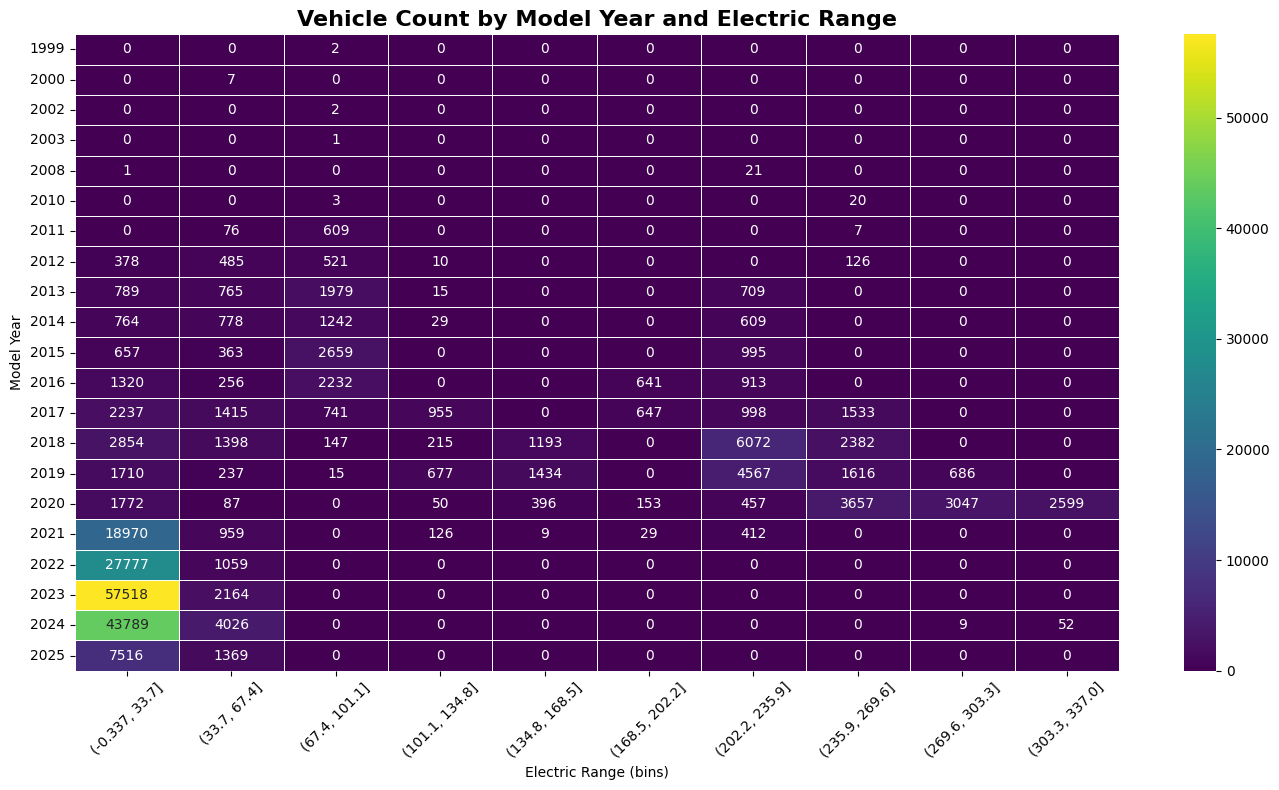

In [23]:
# Create a heatmap of vehicle count by model year and electric range
plt.figure(figsize=(14, 8))

# Create bins for Electric Range
df['Range_bin'] = pd.cut(df['Electric Range'], bins=10)

# Create a crosstab
heatmap_data = pd.crosstab(df['Model Year'], df['Range_bin'])

# Plot heatmap
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=0.5)
plt.title('Vehicle Count by Model Year and Electric Range', fontsize=16, fontweight='bold')
plt.ylabel('Model Year')
plt.xlabel('Electric Range (bins)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()